In [1]:
%pylab inline
from astropy.io import fits
import glob
import pandas as pd
from scipy.interpolate import interp1d
from tools.nirspec import divspec, gluespec
import pdb as pdb
from tools.flux_calculator import extract_hitran_data, calc_fluxes, extract_vup

Populating the interactive namespace from numpy and matplotlib


In [2]:
hdulist20110620=fits.open('./gluedata/AS205/absorption_corrected/abs_corr_AS205_20110620_glue.fits')
hdulist20120512=fits.open('./gluedata/AS205/absorption_corrected/abs_corr_AS205_20120512_glue.fits')
hdulist20120701=fits.open('./gluedata/AS205/absorption_corrected/abs_corr_AS205_20120701_glue.fits')
hdulist20130624=fits.open('./gluedata/AS205/absorption_corrected/abs_corr_AS205_20130624_glue.fits')

# Doppler Shift Correction

In [3]:
import astropy.constants as const
from astropy.time import Time
from astropy.coordinates import SkyCoord
from tools.spec_utils import vgeo

mycoord=SkyCoord('16h11m31.35s', '-18d38m25.96s', frame='icrs')

mydate20110620=Time('2011-06-20T00:00:00.0', format='isot', scale='utc')
mydate20120512=Time('2012-05-12T00:00:00.0', format='isot', scale='utc')
mydate20120701=Time('2012-07-01T00:00:00.0', format='isot', scale='utc')
mydate20130624=Time('2013-06-24T00:00:00.0', format='isot', scale='utc')

vdop20110620 = 11 #km/s

vdop20120512 = -11 #km/s

vdop20120701 = -25 #km/s

vdop20130624 = -24.5 #km/s

def waveShift(vdop, wave):
    return vdop*1e9*wave/(const.c.to('micron/s').value)

#hdulist20110620[1].data['wave'] += waveShift(vdop20110620, hdulist20110620[1].data['wave'])
hdulist20110620[1].data['wave'] += waveShift(vgeo(mydate20110620,mycoord,  vhel=-7.93), hdulist20110620[1].data['wave'])

    
#hdulist20120512[1].data['wave'] += waveShift(vdop20120512, hdulist20120512[1].data['wave'])
hdulist20120512[1].data['wave'] += waveShift(vgeo(mydate20120512,mycoord,  vhel=-7.93), hdulist20120512[1].data['wave'])


#hdulist20120701[1].data['wave'] += waveShift(vdop20120701, hdulist20120701[1].data['wave'])
hdulist20120701[1].data['wave'] += waveShift(vgeo(mydate20120701,mycoord,  vhel=-7.93), hdulist20120701[1].data['wave'])

    
#hdulist20130624[1].data['wave'] += waveShift(vdop20130624, hdulist20130624[1].data['wave'])
hdulist20130624[1].data['wave'] += waveShift(vgeo(mydate20130624,mycoord,  vhel=-7.93), hdulist20130624[1].data['wave'])

    

In [4]:
print(vgeo(mydate20110620,mycoord,  vhel=-7.93))
print(vgeo(mydate20120512,mycoord,  vhel=-7.93))
print(vgeo(mydate20120701,mycoord,  vhel=-7.93))
print(vgeo(mydate20130624,mycoord,  vhel=-7.93))

3.7649033279523234
-14.886166852410732
8.836579316372745
5.766204278171617


In [5]:
out_all = extract_hitran_data('CO', 4.64, 5.04)
hitranCO = extract_vup(out_all,1)
#for i in arange(hitranCO['wave'].size):
#    print(i, "+", hitranCO['wave'][i], "+", hitranCO['Qpp'][i])

# Lineprofiles

## 2012/05/12 shifted +2, 2012/07/01 shifted +4, 2013/06/24 shifted +6

Text(0.5, 0, 'Wavelength ($\\mu$m)')

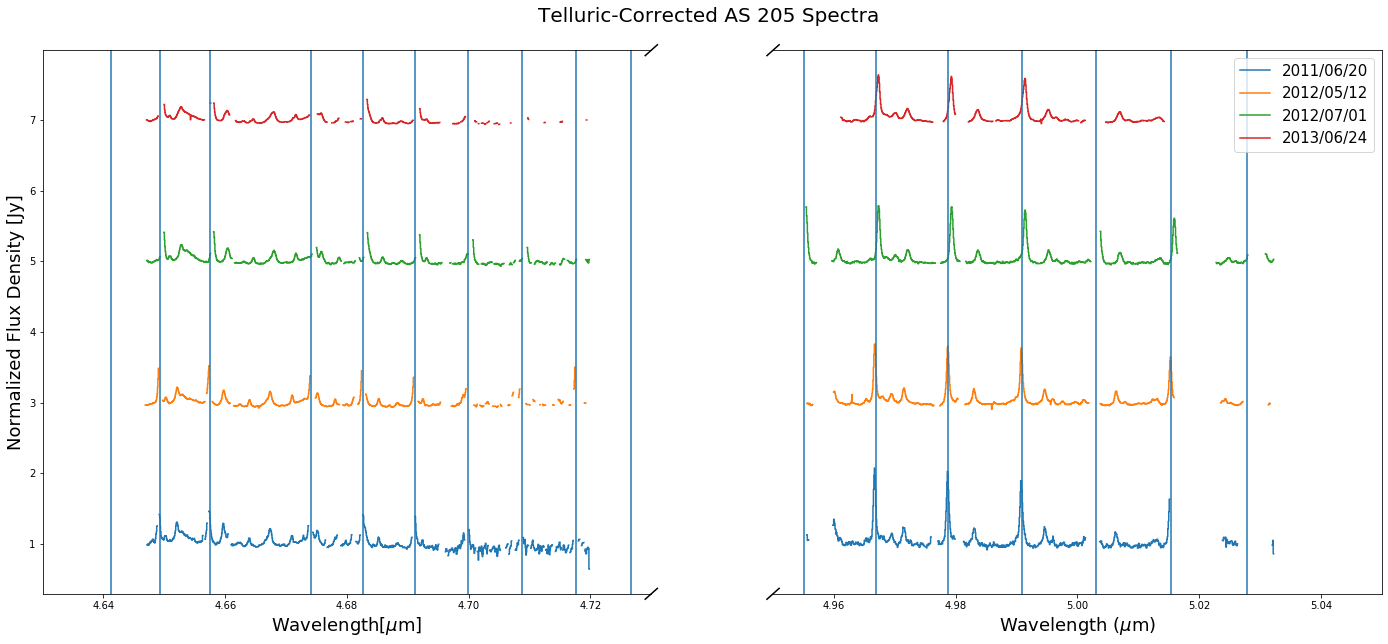

In [6]:
data20110620=hdulist20110620[1].data

data20120512=hdulist20120512[1].data

data20120701=hdulist20120701[1].data

data20130624=hdulist20130624[1].data

fig=plt.figure(figsize=(24,10))
ax=fig.add_subplot(111)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)



ax1.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid')
ax1.plot(data20120512['wave'], data20120512['div']+2, drawstyle='steps-mid')
ax1.plot(data20120701['wave'], data20120701['div']+4, drawstyle='steps-mid')
ax1.plot(data20130624['wave'], data20130624['div']+6, drawstyle='steps-mid')

ax2.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax2.plot(data20120512['wave'], data20120512['div']+2, drawstyle='steps-mid', label='2012/05/12')
ax2.plot(data20120701['wave'], data20120701['div']+4, drawstyle='steps-mid', label='2012/07/01')
ax2.plot(data20130624['wave'], data20130624['div']+6, drawstyle='steps-mid', label='2013/06/24')

ax1.set_xlim(4.63, 4.73)
ax2.set_xlim(4.95, 5.05)

ax2.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.yaxis.set_visible(False)

for wave in hitranCO['wave']:
    ax1.axvline(wave, 0, 30)
    ax2.axvline(wave, 0, 30)
    
ax2.legend(loc=1, prop={'size': 15})
    

d = .01 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)

ax1.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)


ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.axis('off')

ax.set_title('Telluric-Corrected AS 205 Spectra \n', fontsize=20)
ax1.set_xlabel('Wavelength[$\mu$m]', fontsize=18)
ax2.set_xlabel('Wavelength ($\mu$m)', fontsize=18)

#fig.savefig('./Plots/Telluric-Corrected_AS205_Spectra')


Text(0, 0.5, 'Normalized Flux Density [Jy]')

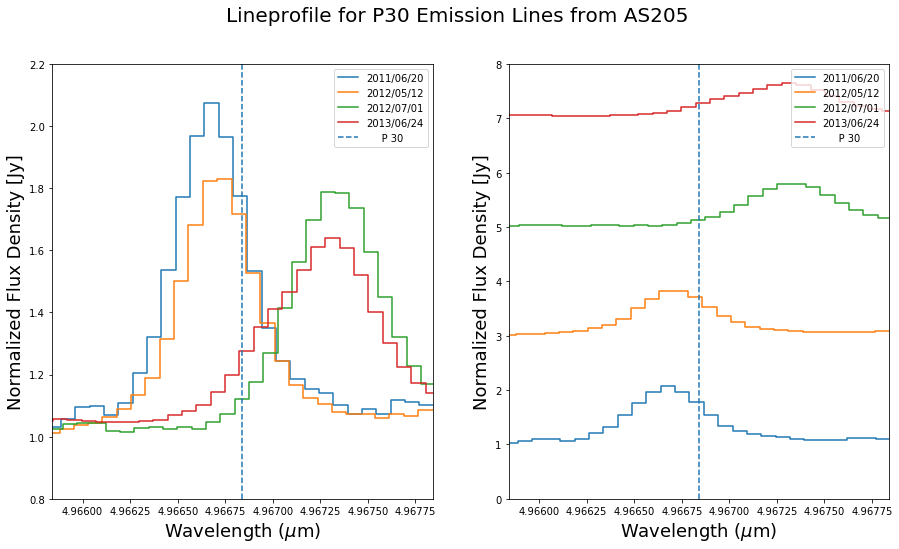

In [7]:
fig=plt.figure(figsize=(15,8))
ax7=fig.add_subplot(121)
ax8=fig.add_subplot(122)

ax7.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax7.plot(data20120512['wave'], data20120512['div'], drawstyle='steps-mid', label='2012/05/12')
ax7.plot(data20120701['wave'], data20120701['div'], drawstyle='steps-mid', label='2012/07/01')
ax7.plot(data20130624['wave'], data20130624['div'], drawstyle='steps-mid', label='2013/06/24')

ax7.set_xlim(hitranCO['wave'][5]-0.001, hitranCO['wave'][5]+0.001)
ax7.set_ylim(0.8, 2.2)

ax8.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax8.plot(data20120512['wave'], data20120512['div']+2, drawstyle='steps-mid', label='2012/05/12')
ax8.plot(data20120701['wave'], data20120701['div']+4, drawstyle='steps-mid', label='2012/07/01')
ax8.plot(data20130624['wave'], data20130624['div']+6, drawstyle='steps-mid', label='2013/06/24')

ax8.set_xlim(hitranCO['wave'][5]-0.001, hitranCO['wave'][5]+0.001)
ax8.set_ylim(0, 8)

ax7.axvline(hitranCO['wave'][5], 0, 30, label=hitranCO['Qpp'][5], linestyle='--')
ax8.axvline(hitranCO['wave'][5], 0, 30, label=hitranCO['Qpp'][5], linestyle='--')
    

ax7.legend(loc=1, prop={'size': 10})
ax8.legend(loc=1, prop={'size': 10})

fig.suptitle("Lineprofile for P30 Emission Lines from AS205", fontsize=20)
ax7.set_xlabel('Wavelength ($\mu$m)', fontsize=18)
ax8.set_xlabel('Wavelength ($\mu$m)', fontsize=18)
ax7.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)
ax8.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)


#fig.savefig('./Plots/P30LineProfile')



Text(0, 0.5, 'Normalized Flux Density [Jy]')

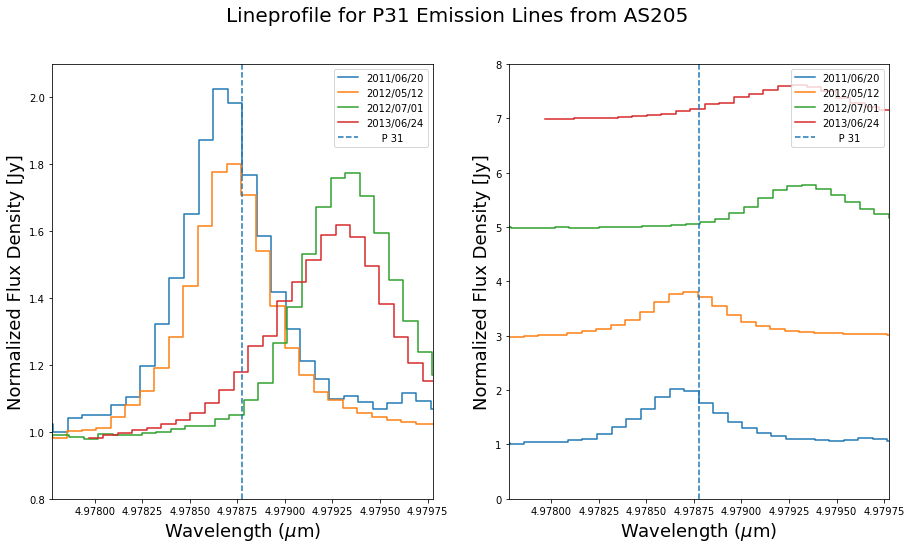

In [8]:
fig=plt.figure(figsize=(15,8))
ax9=fig.add_subplot(121)
ax0=fig.add_subplot(122)

ax9.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax9.plot(data20120512['wave'], data20120512['div'], drawstyle='steps-mid', label='2012/05/12')
ax9.plot(data20120701['wave'], data20120701['div'], drawstyle='steps-mid', label='2012/07/01')
ax9.plot(data20130624['wave'], data20130624['div'], drawstyle='steps-mid', label='2013/06/24')

ax9.set_xlim(hitranCO['wave'][4]-0.0010, hitranCO['wave'][4]+0.0010)
ax9.set_ylim(0.8, 2.1)

ax0.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax0.plot(data20120512['wave'], data20120512['div']+2, drawstyle='steps-mid', label='2012/05/12')
ax0.plot(data20120701['wave'], data20120701['div']+4, drawstyle='steps-mid', label='2012/07/01')
ax0.plot(data20130624['wave'], data20130624['div']+6, drawstyle='steps-mid', label='2013/06/24')

ax0.set_xlim(hitranCO['wave'][4]-0.0010, hitranCO['wave'][4]+0.0010)
ax0.set_ylim(0, 8)

ax9.axvline(hitranCO['wave'][4], 0, 30, label=hitranCO['Qpp'][4], linestyle='--')
ax0.axvline(hitranCO['wave'][4], 0, 30, label=hitranCO['Qpp'][4], linestyle='--')
    
ax0.legend(loc=1, prop={'size': 10})
ax9.legend(prop={'size': 10})


fig.suptitle("Lineprofile for P31 Emission Lines from AS205", fontsize=20)
ax9.set_xlabel('Wavelength ($\mu$m)', fontsize=18)
ax0.set_xlabel('Wavelength ($\mu$m)', fontsize=18)
ax9.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)
ax0.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)

#fig.savefig('./Plots/P31LineProfile')


Text(0, 0.5, 'Normalized Flux Density [Jy]')

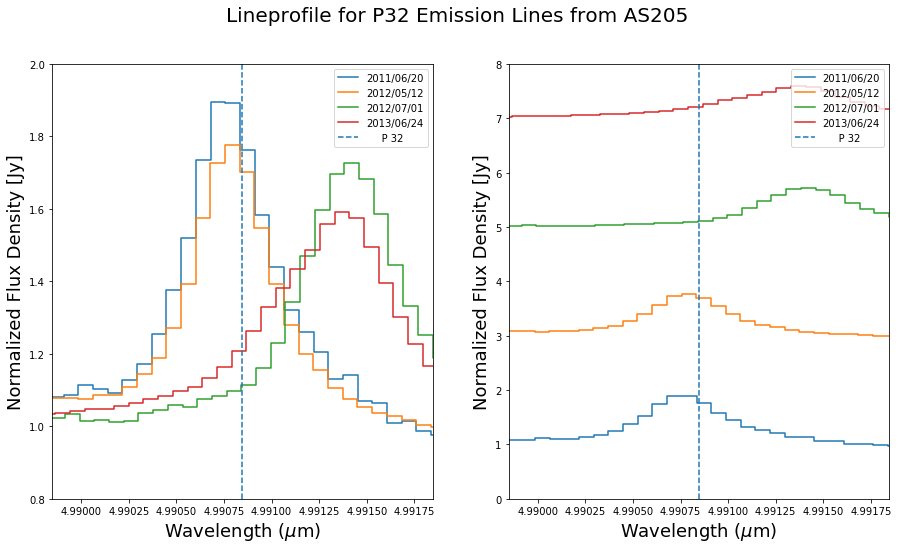

In [9]:
fig=plt.figure(figsize=(15,8))
ax1=fig.add_subplot(111)
ax9=fig.add_subplot(121)
ax0=fig.add_subplot(122)


ax9.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax9.plot(data20120512['wave'], data20120512['div'], drawstyle='steps-mid', label='2012/05/12')
ax9.plot(data20120701['wave'], data20120701['div'], drawstyle='steps-mid', label='2012/07/01')
ax9.plot(data20130624['wave'], data20130624['div'], drawstyle='steps-mid', label='2013/06/24')

ax9.set_xlim(hitranCO['wave'][3]-0.001, hitranCO['wave'][3]+0.001)
ax9.set_ylim(0.8, 2)

ax0.plot(data20110620['wave'], data20110620['div'], drawstyle='steps-mid', label='2011/06/20')
ax0.plot(data20120512['wave'], data20120512['div']+2, drawstyle='steps-mid', label='2012/05/12')
ax0.plot(data20120701['wave'], data20120701['div']+4, drawstyle='steps-mid', label='2012/07/01')
ax0.plot(data20130624['wave'], data20130624['div']+6, drawstyle='steps-mid', label='2013/06/24')

ax0.set_xlim(hitranCO['wave'][3]-0.001, hitranCO['wave'][3]+0.001)
ax0.set_ylim(0, 8)

ax9.axvline(hitranCO['wave'][3], 0, 30, label=hitranCO['Qpp'][3], linestyle='--')
ax0.axvline(hitranCO['wave'][3], 0, 30, label=hitranCO['Qpp'][3], linestyle='--')
    

ax1.axis('off')

ax0.legend()

ax0.legend(loc=1, prop={'size': 10})
ax9.legend(prop={'size': 10})

fig.suptitle("Lineprofile for P32 Emission Lines from AS205", fontsize=20)
ax9.set_xlabel('Wavelength ($\mu$m)', fontsize=18)
ax0.set_xlabel('Wavelength ($\mu$m)', fontsize=18)
ax9.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)
ax0.set_ylabel('Normalized Flux Density [Jy]', fontsize=18)


#fig.savefig('./Plots/P32LineProfile')



In [10]:
#t1 = calc_fluxes(data20110620['wave'],data20110620['div'],hitranCO, vet_fits=True)

In [11]:
#t2=calc_fluxes(data20120512['wave'],data20120512['div'],hitranCO, vet_fits=True)

In [12]:
#t3=calc_fluxes(data20120701['wave'],data20120701['div'],hitranCO, vet_fits=True)

In [13]:
#t4=calc_fluxes(data20130624['wave'],data20130624['div'],hitranCO, vet_fits=True)

# Linefluxes. 2011/06 shifted -0.0009, 2012/05 shifted -0.0003, 2012/07 shifted +0.0003, 2013/06 shifted +0.0009

NameError: name 't1' is not defined

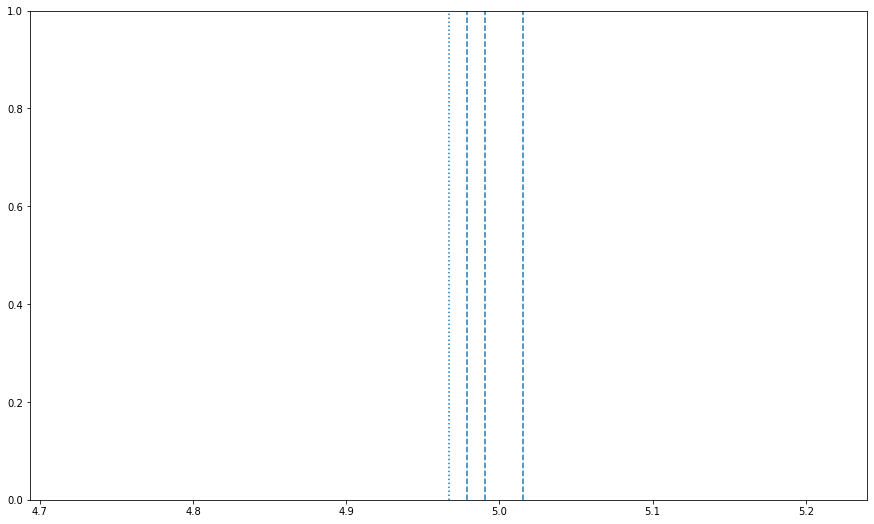

In [14]:
fig=plt.figure(figsize=(15,9))
ax1 = fig.add_subplot(111)


ax1.axvline(hitranCO['wave'][5], 0, 30, linestyle=':', fillstyle='bottom')
ax1.axvline(hitranCO['wave'][4], 0, 30, linestyle='--')
ax1.axvline(hitranCO['wave'][3], 0, 30, linestyle='--')
ax1.axvline(hitranCO['wave'][1], 0, 30, linestyle='--')

errorbar(t1['wave']-0.0009, t1['lineflux'], yerr=t1['lineflux_err'], fmt='ro', label='2011/06/20')
errorbar(t2['wave']-0.0003, t2['lineflux'], yerr=t2['lineflux_err'], fmt='bs', label='2012/05/12')
errorbar(t3['wave']+0.0003, t3['lineflux'], yerr=t3['lineflux_err'], fmt='gP', label='2012/07/01')
errorbar(t4['wave']+0.0009, t4['lineflux'], yerr=t4['lineflux_err'], fmt='yx', label='2013/06/24')

ax1.set_xlim(4.96, 5.02)

ax1.set_title('Lineflux from AS 205 CO Emission Lines', fontsize=20)
ax1.set_ylabel('Total Flux [erg cm$^{-2}$ s$^{-1}$]', fontsize=18)
ax1.set_xlabel('Wavelength [$\mu$m]', fontsize=18)

ax1.legend(loc=1)

props = dict(boxstyle='round', facecolor='white', alpha=1)

ax1.text(0.09, 0.3, "P 30", transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.text(0.3, 0.3, "P 31", transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.text(0.5, 0.8, "P 32", transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)
ax1.text(0.9, 0.8, "P 34", transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

#fig.savefig('./Plots/Linefluxes')


In [ ]:
from tools.flux_calculator import make_rotation_diagram

graph1 = make_rotation_diagram(t1)
graph2 = make_rotation_diagram(t2)
graph3 = make_rotation_diagram(t3)
graph4 = make_rotation_diagram(t4)

fig=plt.figure(figsize=(15,9))
ax1=fig.add_subplot(111)

ax1.plot(graph1['x'], graph1['y'], 'ro', label='2011/06/20')
ax1.plot(graph2['x'], graph2['y'], 'bs', label='2012/05/12')
ax1.plot(graph3['x'], graph3['y'], 'gP', label='2012/07/01')
ax1.plot(graph4['x'], graph4['y'], 'yx', label='2013/06/24')

ax1.legend(prop={'size': 18})
ax1.set_title("Rotation Diagram for AS 205 Observations", fontsize=20)
ax1.set_ylabel('$ln\\dfrac{F}{Ag\~\\nu}$', fontsize=18)

ax1.set_xlabel('$\\dfrac{\Delta E}{k_B}$ [K]', fontsize=18)

ax1.grid()

#m1, b1 = np.polyfit(graph1['x'][:3], graph1['y'][:3], 1)#
#m2, b2 = np.polyfit(graph2['x'][:5], graph2['y'][:5], 1)
#m3, b3 = np.polyfit(graph3['x'][:6], graph3['y'][:6], 1)
#m4, b4 = np.polyfit(graph4['x'], graph4['y'], 1)

#ax1.plot(graph1['x'][:3], m1*graph1['x'][:3]+b1, color='r')
#ax1.plot(graph2['x'][:5], m2*graph2['x'][:5]+b2, color='b')
#ax1.plot(graph3['x'][:6], m3*graph3['x'][:6]+b3, color='g')
#ax1.plot(graph4['x'], m4*graph4['x']+b4, color='y')

#fig.savefig('./Plots/RotationDiagram')